In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
# import cleaned data
df_FD = pd.read_pickle('cleaned_MASTER_dataset.pickle')  # fish details
df_LF = pd.read_pickle('cleaned_LENGTHFREQ_dataset.pickle')  # length frequencies
df_SD = pd.read_pickle('cleaned_LOGBOOK_dataset.pickle')  # logbook / sample data

# import formatted and cleaned data
gaspereau_lengthfrequency = pd.read_pickle('gaspereau_lengthfrequency.pickle')
gaspereau_fishdetails = pd.read_pickle('gaspereau_fishdetails.pickle')
gaspereau_sample = pd.read_pickle('gaspereau_sample.pickle')

# most recent year

In [3]:
# most recent year of data - length frequency
gaspereau_lengthfrequency[gaspereau_lengthfrequency.sample_id < 2023000000].sample_id.max() // 1000000

2019

In [4]:
# most recent year of data - fish details
gaspereau_fishdetails.DATETIME.dt.year.max()

2019

In [5]:
# most recent year of data - sample
gaspereau_sample.sample_date.dt.year.max()

2019.0

# length frequencies look good

----------------------------------------------
Histogram: 1996052212


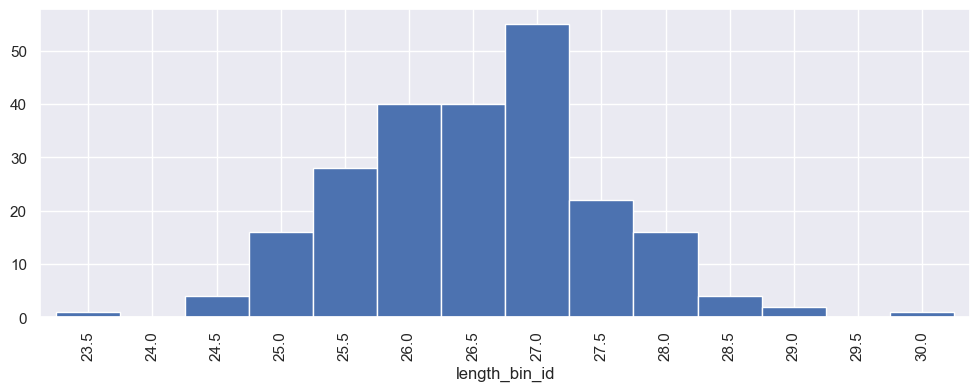

In [6]:
# random samples - length frequencies

for i in range(1):
    sample_id = np.random.choice(gaspereau_lengthfrequency.sample_id.unique())
    print('----------------------------------------------\nHistogram:', sample_id)
    gaspereau_lengthfrequency.loc[gaspereau_lengthfrequency.sample_id==sample_id, ['count', 'length_bin_id']].plot(
        kind='bar', x='length_bin_id', y='count', width=1, figsize=(12,4), legend=False
    )
    plt.show()

# fields comparison - gaspereau fields

In [7]:
# fish details 
sorted(list(gaspereau_fishdetails.columns))

['AGE_1',
 'AGE_2',
 'AGE_COMMENTS_1',
 'AGE_COMMENTS_2',
 'AGE_NOTES',
 'AGING_PERSON_1',
 'AGING_PERSON_2',
 'CONDITION',
 'DATETIME',
 'ENVELOP COMMENTS',
 'FL_FROZEN',
 'FL_WET',
 'FSP_1',
 'FSP_2',
 'FSP_NOTES',
 'SEX',
 'SITE',
 'SPECIES',
 'fish_length',
 'fish_number',
 'fish_weight',
 'gonad_weight',
 'maturity_id',
 'sample_id']

In [8]:
# sample
sorted(list(gaspereau_sample.columns))

['BYCATCH_OTHER',
 'BYCATCH_SBASS',
 'BYCATCH_SHAD',
 'CODE',
 'COMMENTS',
 'HOURS_FISHED',
 'LAST_NAME',
 'NO_NETS',
 'SAMPLER',
 'SITE',
 'ZONE',
 'catch_weight_lbs',
 'district_id',
 'fishing_area_id',
 'gear_id',
 'id',
 'sample_date',
 'sample_weight_lbs']

In [9]:
gaspereau_sample.drop('id',axis=1).describe(include='all').T

C:\Users\CARRK\AppData\Local\Temp\1\ipykernel_4900\3543259403.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  gaspereau_sample.drop('id',axis=1).describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
sample_date,15182,1568,1984-05-25 00:00:00,37,1983-04-18,2019-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
district_id,15213.000,NaN,NaN,NaN,NaT,NaT,2.000,0.000,2.000,2.000,2.000,2.000,2.000
fishing_area_id,15213,1,SWMARG,15213,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAMPLER,15213,76,Martin E Cameron,1209,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE,0,0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gear_id,15213.000,NaN,NaN,NaN,NaT,NaT,81.000,0.000,81.000,81.000,81.000,81.000,81.000
SITE,15213,61,12,1209,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO_NETS,9623,2,1,9574,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
catch_weight_lbs,15200.000,NaN,NaN,NaN,NaT,NaT,1696.968,4365.462,0.000,100.000,400.000,1400.000,95200.000
HOURS_FISHED,13534,38,14,2059,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
gaspereau_fishdetails.SPECIES.unique()

array(['A', 'B', 'U', nan], dtype=object)

In [11]:
gaspereau_samplers = list()
current_name = ['', '']

for i in sorted(str(x) for x in gaspereau_sample.SAMPLER.unique()):
    name = i.rsplit(maxsplit=1)  # put initials into first name
       
    # only remove exact case-insensitive matches (leave inconsistent middle initials, typos etc)
    if [x.lower() for x in current_name] != [x.lower() for x in name]:
        gaspereau_samplers.append(name)
            
    current_name = name
    
gaspereau_samplers = pd.DataFrame(gaspereau_samplers, columns=['first_name', 'last_name'])
gaspereau_samplers['notes'] = pd.NA

# save to file
if save_this := False:  # change this to save it
    gaspereau_samplers.to_pickle('gaspereau_samplers.pickle')
    gaspereau_samplers.to_csv('gaspereau_samplers.csv')

In [15]:
import csv

with open('gaspereau_samplers.csv', mode='r') as f:
    reader = csv.reader(f)
    temp = [[rows[1], rows[2]] for rows in reader]
    
temp

[['first_name', 'last_name'],
 ['Alexander', 'Gillis'],
 ['Alexander', 'MacDonald'],
 ['Allan B', 'Gillis'],
 ['Anthony', 'Cameron'],
 ['Brian', 'Doyle'],
 ['Brian', 'MacFarlane'],
 ['Bruce', 'MacLellan'],
 ['Bruce', 'McLellan'],
 ['Catherine', 'MacFarlane'],
 ['Catherine', 'MacLeod'],
 ['Charles', 'McDaniel'],
 ['Chris', 'MacLean'],
 ['Colin', 'Gillis'],
 ['Daniel', 'Stewart'],
 ['Darlene', 'Cameron'],
 ['David', 'MacKinnon'],
 ['Donald D', 'Gillis'],
 ['Donald J', 'Gillis'],
 ['Donald M', 'Campbell'],
 ['Donald', 'MacEachern'],
 ['Donald', 'MacLeod'],
 ['Donelda M', 'Gillis'],
 ['Eleanor', 'MacLellan'],
 ['Eleanor', 'McDaniel'],
 ['Elizabeth', 'MacKinnon'],
 ['Elizabeth/Vincent', 'MacKinnon'],
 ['Finley', 'MacDonald'],
 ['Finley', 'Stewart'],
 ['Florence', 'Gillis'],
 ['Fred', 'Ingram'],
 ['Gerard', 'MacFarlane'],
 ['Gerard V', 'Chiasson'],
 ['Harold', 'MacFarlane'],
 ['Hugh J', 'Gillis'],
 ['Hughie', 'MacDonnell'],
 ['Irene', 'MacIsaac'],
 ['Jack', 'MacLellan'],
 ['James A', 'Hirtle

In [65]:
# list of all sites from the logbook
sites = set(df_SD.SITE_NO.str.split(',', expand=True).values.ravel())
sites = sorted([str(x) for x in sites if x != None])
sites = [x for x in sites if len(x) == 1 or x in ['1A', '1B']] + [x for x in sites if len(x) > 1 and x not in ['1A', '1B']]
sites

['1',
 '1A',
 '1B',
 '2',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '11',
 '12',
 '15',
 '17',
 '18',
 '19',
 '20',
 '21',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '37',
 '38',
 '39',
 '40',
 '41',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68']